In [2]:
import pandas as pd

Simple web scraping can be done with `pandas.read_html`.  This returns a list of the tables within a web page.  We'll scrape the US Centers for Disease Control [Lyme disease statistics page](http://www.cdc.gov/lyme/stats/tables.html)

In [3]:
rr = pd.read_html("http://www.cdc.gov/lyme/stats/tables.html")
len(rr)

2

First table is number of cases, second is incidence per 100,000 population

In [4]:
cases, incid = rr[0],rr[1]
incid.head()

,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Alabama,0.1,0.2,0.3,0.1,0.1,0.0,0.2,0.3,0.2,0.6
1,Alaska,0.6,0.4,1.5,0.9,1.0,1.0,1.2,0.5,1.9,0.7
2,Arizona,0.2,0.2,0.0,0.0,0.0,0.0,0.1,0.1,0.3,0.2
3,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,0.3,0.2,0.2,0.2,0.3,0.4,0.0,0.2,0.2,0.1


this isn't too bad, but it's transposed from the typical order (states as columns)

In [8]:
states = incid.State[0:50]   ## leave out total
incid0 = incid.iloc[0:50,1:] ## values
incid1 = incid0.transpose()
incid1.head()
incid1.rename(columns=states,inplace=True)
incid1.head()



,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
2005,0.1,0.6,0.2,0,0.3,0,51.7,76.7,1.7,0.3,...,0.4,0.3,0.1,0.3,0.1,8.7,3.6,0.2,3.4,26.4
2006,0.2,0.4,0.2,0,0.2,0,51,56.5,10.7,0.2,...,0.5,0.1,0.2,0.1,0.2,16.8,4.7,0.1,1.5,26.4
2007,0.3,1.5,0,0,0.2,0,87.3,82.7,19.7,0.2,...,0.7,0,0.5,0.4,0.3,22.2,12.4,0.2,4.6,32.4
2008,0.1,0.9,0,0,0.2,0,78.2,88.4,12,0.4,...,0.3,0.4,0.1,0.4,0.1,53.1,11.4,0.3,6.6,26.5
2009,0.1,1,0,0,0.3,0,78.2,111.2,8.8,0.4,...,0.5,0.1,0.2,0.4,0.2,51.9,8.9,0.2,7.9,34.5


Unfortunately, there are some columns containing "N" ("not notifiable"), which got turned into strings:

In [11]:
incid2 = incid1.apply(pd.to_numeric,errors="coerce")

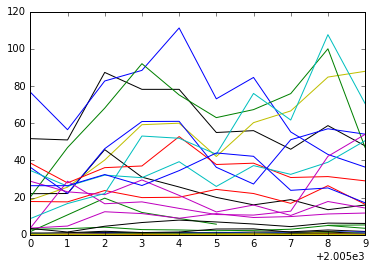

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(incid2);

and let's turn the index into a proper date/time object:

In [16]:
incid2.index = pd.to_datetime(incid2.index)

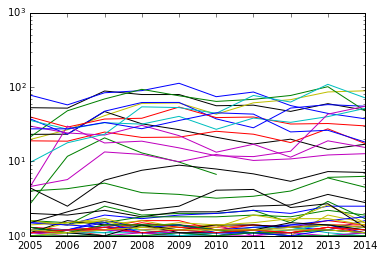

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
%matplotlib inline
plt.semilogy(1+incid2);
plt.show()